In [53]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt



In [56]:
stock_names = ['SPY', 'META', 'GOOGL', 'MSFT']

end_date = datetime.today()
n_years = 5
start_date = end_date - timedelta(days=n_years * 365)

stock_data = yf.download(
    tickers=stock_names,
    start=start_date,
    end=end_date
)

print("Columns in stock_data:", stock_data.columns)

if 'Adj Close' in stock_data.columns:
    price_block = stock_data['Adj Close']
else:
    price_block = stock_data['Close']

df = pd.concat([price_block[t] for t in stock_names], axis=1)
df.columns = stock_names

print(df.head())






[*********************100%***********************]  4 of 4 completed

Columns in stock_data: MultiIndex([( 'Close', 'GOOGL'),
            ( 'Close',  'META'),
            ( 'Close',  'MSFT'),
            ( 'Close',   'SPY'),
            (  'High', 'GOOGL'),
            (  'High',  'META'),
            (  'High',  'MSFT'),
            (  'High',   'SPY'),
            (   'Low', 'GOOGL'),
            (   'Low',  'META'),
            (   'Low',  'MSFT'),
            (   'Low',   'SPY'),
            (  'Open', 'GOOGL'),
            (  'Open',  'META'),
            (  'Open',  'MSFT'),
            (  'Open',   'SPY'),
            ('Volume', 'GOOGL'),
            ('Volume',  'META'),
            ('Volume',  'MSFT'),
            ('Volume',   'SPY')],
           names=['Price', 'Ticker'])
                   SPY        META       GOOGL        MSFT
Date                                                      
2021-02-04  360.499176  264.641357  101.911476  232.218216
2021-02-05  361.918091  266.240265  103.658279  232.400513
2021-02-08  364.531860  264.730743  103.44

In [57]:
stock_log_returns = np.log(df/df.shift(1))
average_log_return = stock_log_returns.mean(1)



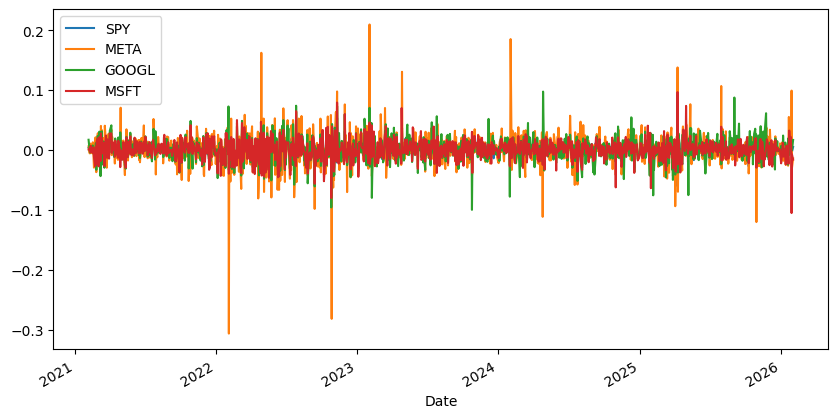

In [58]:
stock_log_returns.plot(figsize=(10,5))
plt.show()

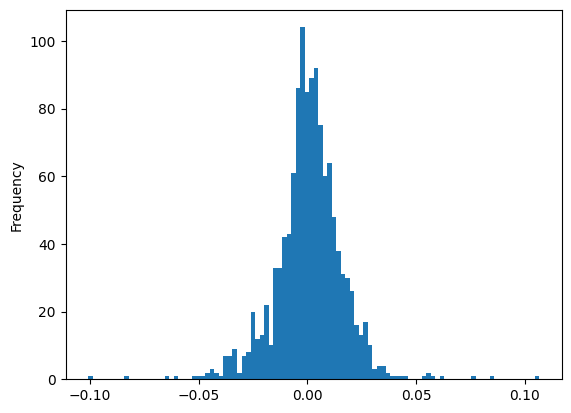

In [59]:
average_log_return.plot.hist(bins=100)
plt.show()

In [ ]:
## stock allocation.

In [60]:
average_log_returns = stock_log_returns.mean(axis=1)
absolute_weights = weights.abs()
absolute_weights_sum = np.sum(absolute_weights, axis=1)
adjusted_weights = weights.div(absolute_weights_sum, axis=0).dropna()


In [61]:
adjusted_weights.tail(3)

,SPY,META,GOOGL,MSFT
Date,,,,
2026-01-29,0.007401,-0.466862,-0.033138,0.492599
2026-01-30,-0.185261,0.500000,-0.242309,-0.072431
2026-02-02,-0.137267,0.230495,-0.362733,0.269505


In [62]:
ptf_daily_returns = (adjusted_weights.shift(1) * stock_log_returns).dropna()

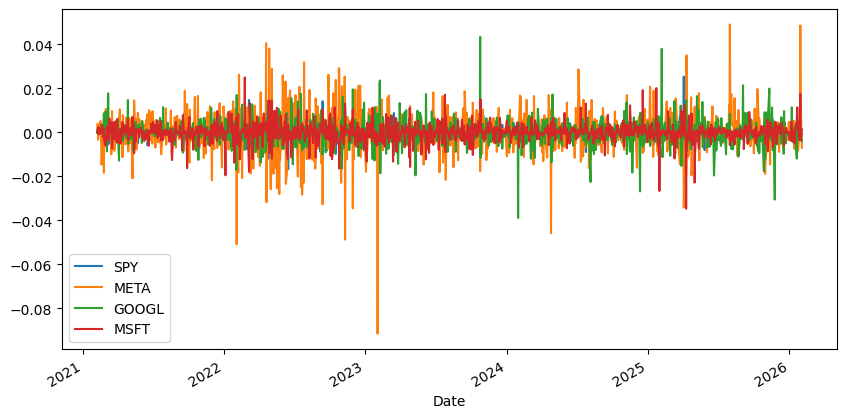

In [63]:
ptf_daily_returns.plot(figsize=(10,5)) 
plt.show()

In [ ]:
## daily strategy returns

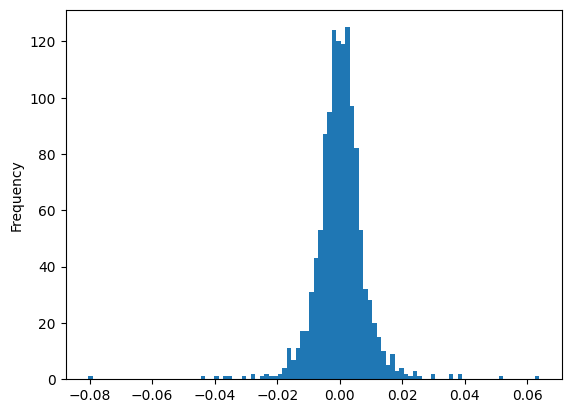

In [66]:
daily_strategy_returns = np.sum(ptf_daily_returns, axis=1)
daily_strategy_returns.plot.hist(bins=100)
plt.show()

In [65]:
ann_avg_ret = 252 * np.mean(daily_strategy_returns)
print = (ann_avg_ret)